<h1>World Leaders Image Classifier Model<h1>

In [1]:
import cv2
import matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('./test_images/macron_3.jpeg')
img.shape

(159, 318, 3)

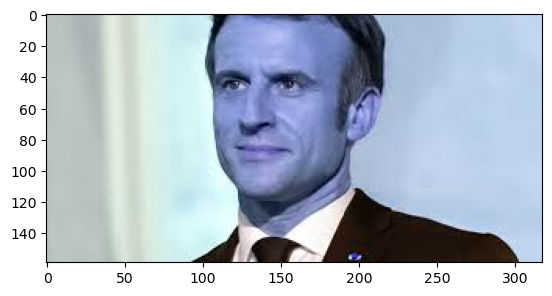

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(159, 318)

In [5]:
gray

array([[193, 193, 193, ..., 218, 218, 218],
       [193, 193, 193, ..., 218, 218, 218],
       [193, 193, 193, ..., 218, 218, 218],
       ...,
       [189, 190, 191, ..., 219, 219, 219],
       [189, 190, 191, ..., 218, 218, 218],
       [189, 190, 191, ..., 218, 218, 218]], dtype=uint8)

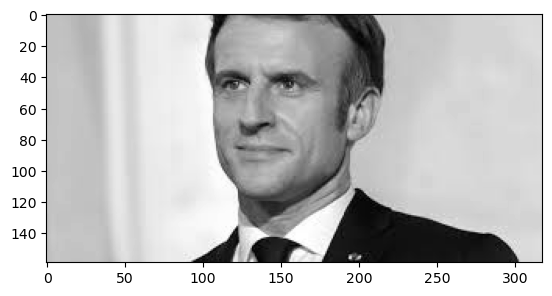

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[90,  9, 96, 96]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(90, 9, 96, 96)

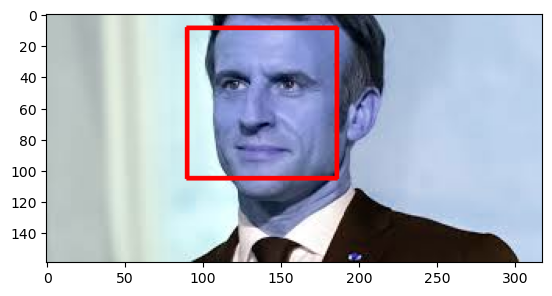

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

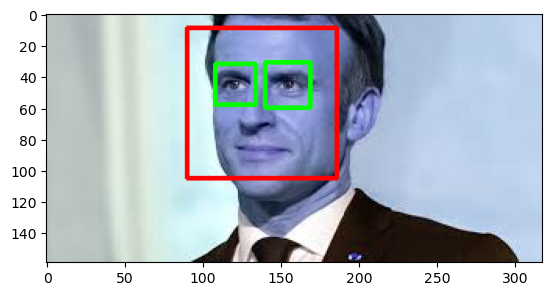

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

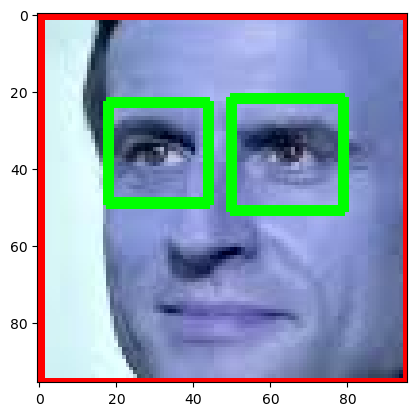

In [11]:
plt.imshow(roi_color, cmap='gray')

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(96, 96, 3)

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        return roi_color
        if len(eyes) >= 2:
            return roi_color

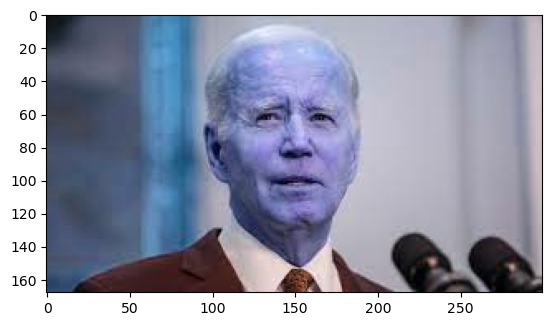

In [14]:
original_image = cv2.imread('./test_images/biden_1.jpeg')
plt.imshow(original_image)

In [15]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/biden_1.jpeg')

In [16]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [17]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['./dataset/.ipynb_checkpoints',
 './dataset/cropped',
 './dataset/emmanuel_macron',
 './dataset/joe_biden',
 './dataset/king_charles',
 './dataset/vladimir_putin']

In [19]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
cropped_image_dirs = []
president_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    president_name = img_dir.split('/')[-1]
    president_file_names_dict[president_name] = []
     
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + president_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('Generating cropped images in folder:', cropped_folder)
            
            cropped_file_name = president_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            president_file_names_dict[president_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder: ./dataset/cropped/emmanuel_macron
Generating cropped images in folder: ./dataset/cropped/joe_biden
Generating cropped images in folder: ./dataset/cropped/king_charles
Generating cropped images in folder: ./dataset/cropped/vladimir_putin


In [21]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

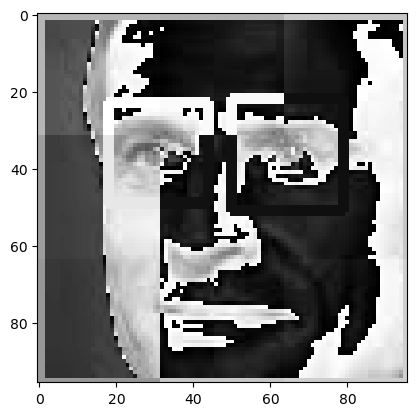

In [22]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [23]:
president_file_names_dict

{'.ipynb_checkpoints': [],
 'cropped': [],
 'emmanuel_macron': ['./dataset/cropped/emmanuel_macron/emmanuel_macron1.png',
  './dataset/cropped/emmanuel_macron/emmanuel_macron2.png',
  './dataset/cropped/emmanuel_macron/emmanuel_macron3.png',
  './dataset/cropped/emmanuel_macron/emmanuel_macron4.png',
  './dataset/cropped/emmanuel_macron/emmanuel_macron5.png',
  './dataset/cropped/emmanuel_macron/emmanuel_macron6.png',
  './dataset/cropped/emmanuel_macron/emmanuel_macron7.png',
  './dataset/cropped/emmanuel_macron/emmanuel_macron8.png',
  './dataset/cropped/emmanuel_macron/emmanuel_macron9.png',
  './dataset/cropped/emmanuel_macron/emmanuel_macron10.png',
  './dataset/cropped/emmanuel_macron/emmanuel_macron11.png',
  './dataset/cropped/emmanuel_macron/emmanuel_macron12.png',
  './dataset/cropped/emmanuel_macron/emmanuel_macron13.png',
  './dataset/cropped/emmanuel_macron/emmanuel_macron14.png',
  './dataset/cropped/emmanuel_macron/emmanuel_macron15.png',
  './dataset/cropped/emmanuel_ma

In [24]:
class_dict = {}
count = 0
for president_name in president_file_names_dict.keys():
    class_dict[president_name] = count
    count = count + 1
class_dict

{'.ipynb_checkpoints': 0,
 'cropped': 1,
 'emmanuel_macron': 2,
 'joe_biden': 3,
 'king_charles': 4,
 'vladimir_putin': 5}

In [25]:
X, y = [], []
for president_name, training_files in president_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[president_name])     

In [26]:
len(X[0])

4096

In [27]:
X[0]

array([[ 0],
       [14],
       [43],
       ...,
       [25],
       [ 0],
       [ 0]], dtype=uint8)

In [28]:
y[0]

2

In [29]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(70, 4096)

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.3888888888888889

In [32]:
print(classification_report(y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           2       0.29      1.00      0.44         2
           3       0.40      0.29      0.33         7
           4       0.00      0.00      0.00         3
           5       0.50      0.50      0.50         6

    accuracy                           0.39        18
   macro avg       0.30      0.45      0.32        18
weighted avg       0.35      0.39      0.35        18



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [34]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [35]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.732727,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.592727,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.649091,{'logisticregression__C': 1}


In [36]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [37]:
best_estimators['svm'].score(X_test,y_test)

0.5555555555555556

In [38]:
best_estimators['random_forest'].score(X_test,y_test)

0.4444444444444444

In [39]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.4444444444444444

In [40]:
best_clf = best_estimators['svm']

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm


array([[2, 0, 0, 0],
       [0, 4, 0, 3],
       [0, 1, 0, 2],
       [0, 0, 2, 4]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

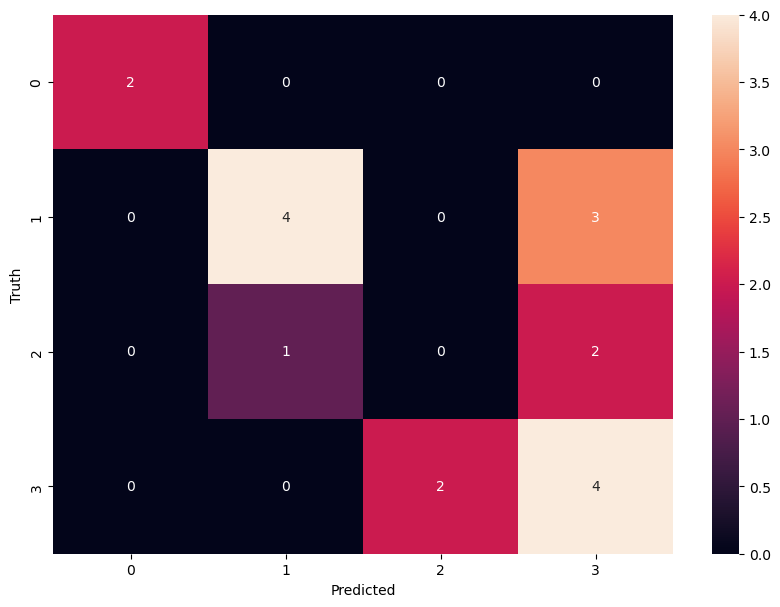

In [42]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
__class_name_to_number = {}
__class_number_to_name = {}

In [44]:
__class_name_to_number = {"emmanuel_macron": 0, "joe_biden": 1, "king_charles": 2, "vladimir_putin": 3}
__class_number_to_name = {v:k for k,v in __class_name_to_number.items()}

In [50]:
__class_number_to_name

{0: 'emmanuel_macron', 1: 'joe_biden', 2: 'king_charles', 3: 'vladimir_putin'}

In [45]:
def get_cropped_image_if_2_eyes(image_path, image_base64_data):
    face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

    if image_path:
        img = cv2.imread(image_path)
    else:
        img = get_cv2_image_from_base64_string(image_base64_data)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    cropped_faces = []
    for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                cropped_faces.append(roi_color)
    return cropped_faces


In [46]:
def class_number_to_name(class_num):
    return __class_number_to_name[class_num]

In [72]:
def classify_image(image_base64_data, file_path=None):

    imgs = get_cropped_image_if_2_eyes(file_path,image_base64_data)
    
    result = []
    for img in imgs:
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))

        len_image_array = 32*32*3 + 32*32

        final = combined_img.reshape(1,len_image_array).astype(float)
        #index_pred = best_clf.predict(final)[0]
        prob_pred = np.around(best_clf.predict_proba(final)*100,2).tolist()[0]
        pred = max(enumerate(prob_pred),key=lambda x: x[1])[0]
        
        name = class_number_to_name(pred)
        pred_result = print("Name: {}".format(name))

    return pred_result

In [81]:
classify_image(None,'./test_images/macron_1.jpeg')

Name: emmanuel_macron
